In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import os
os.chdir('E:\csv files')
data = pd.read_csv("Churn_Modelling.csv", header = 'infer')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data=data.drop('RowNumber',axis=1)

# Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
## Looks mostly good except Customer ID

data['CustomerId'] = data['CustomerId'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Outliers correction 

In [10]:
def remove_outliers(df_in,col_name):
    q1=df_in[col_name].quantile(0.25)
    q3=df_in[col_name].quantile(0.75)
    iqr=q3-q1#inter quartle range
    fence_low=q1-1.5*iqr
    fence_high=q3+1.5*iqr
    df_out=df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=data.select_dtypes(include=numerics)

for col in numeric_df.columns:
    print(col)
    remove_outliers(numeric_df,col)

CreditScore
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


# Correlation Check

<AxesSubplot:>

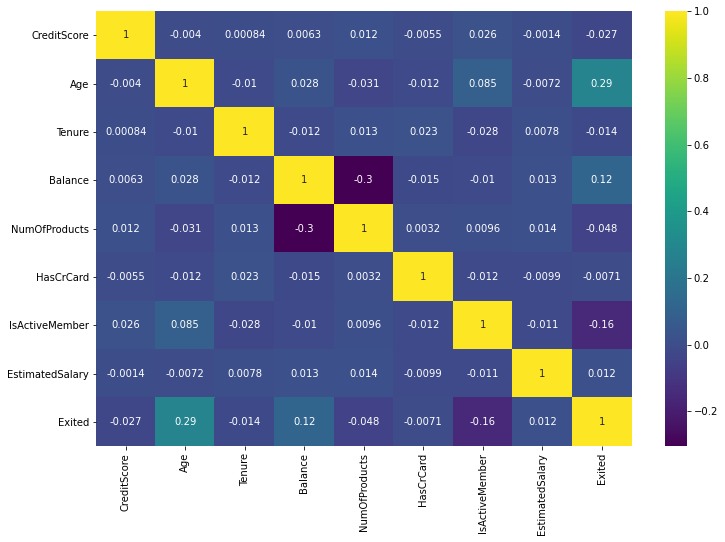

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis')

# Univariate Analyis

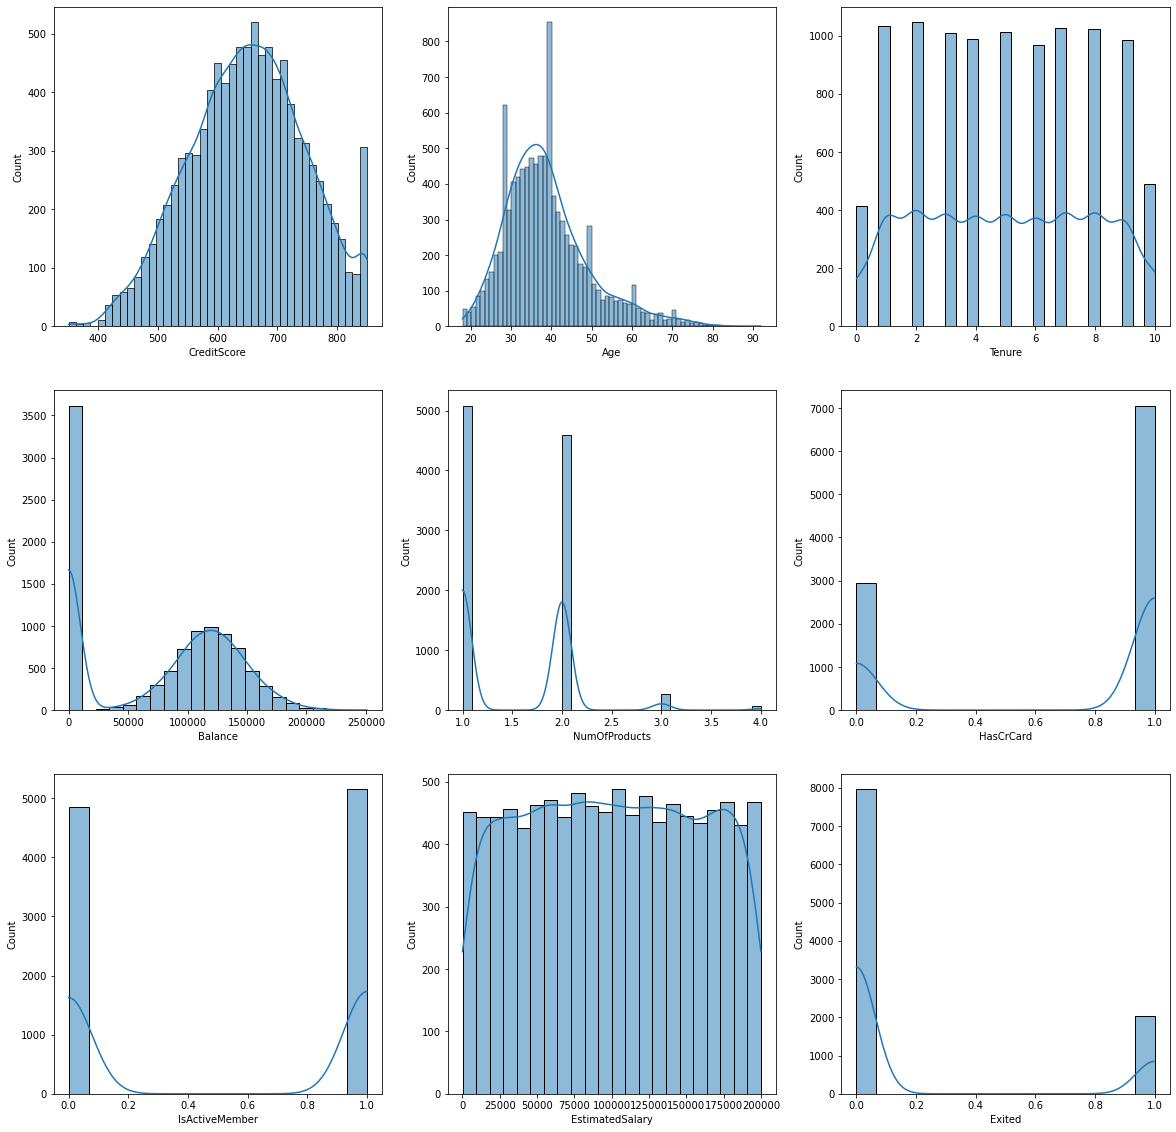

In [12]:
fig,axes=plt.subplots(nrows=3,ncols=3)
axes=axes.flatten()
fig.set_size_inches(20,20)
for ax,col in zip(axes,numeric_df.columns):
    sns.histplot(numeric_df[col],ax=ax,kde=True)

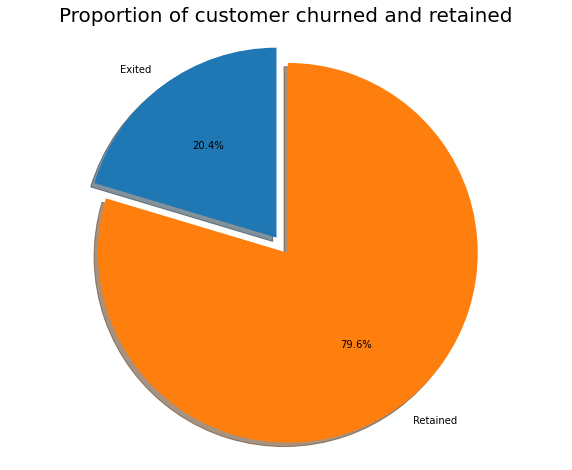

In [13]:
labels='Exited','Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]                 
explode=(0,0.1)
fig1,ax1=plt.subplots(figsize=(10,8))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Geography', ylabel='count'>

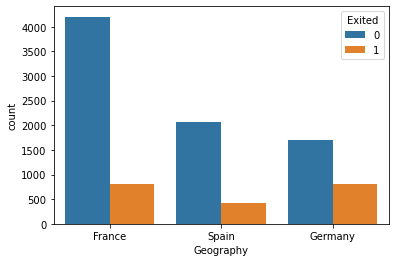

In [14]:
### Loan Status Count

# We first review the 'Status' relation with categorical variables

sns.countplot(x='Geography',hue='Exited',data=data)


<AxesSubplot:xlabel='Gender', ylabel='count'>

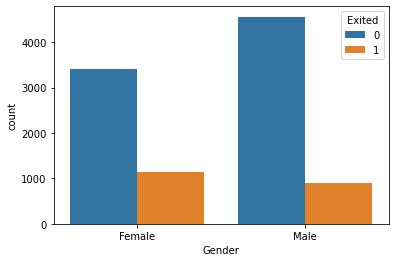

In [15]:
sns.countplot(x='Gender',hue='Exited',data=data)


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

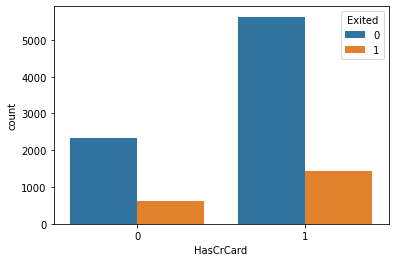

In [16]:
sns.countplot(x='HasCrCard',hue='Exited',data=data)


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

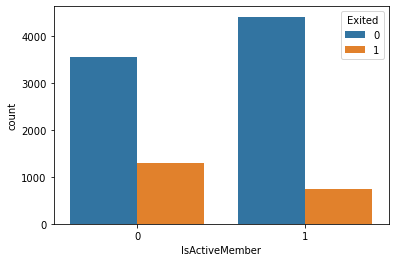

In [17]:
sns.countplot(x='IsActiveMember',hue='Exited',data=data)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

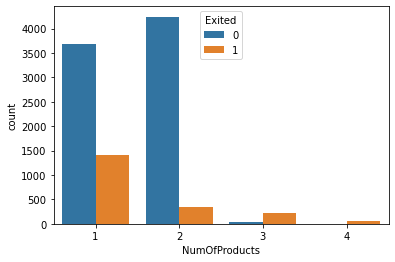

In [18]:

sns.countplot(x = "NumOfProducts", hue="Exited", data = data)


<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

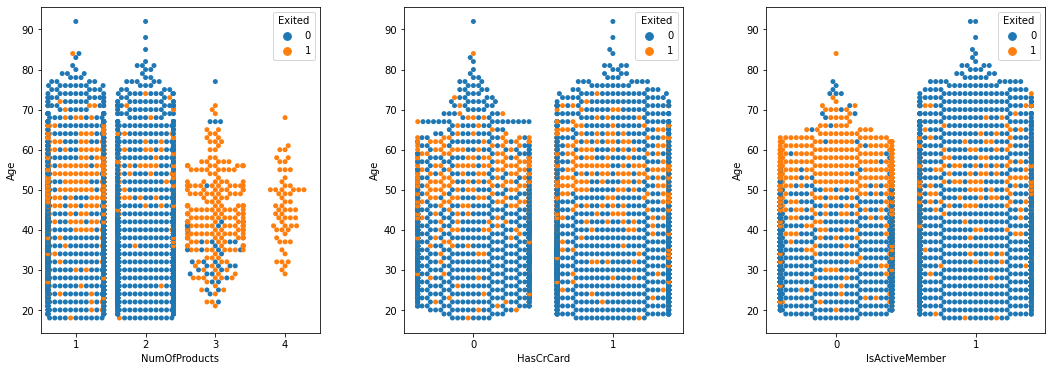

In [25]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = data, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = data, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = data, ax = ax[2])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

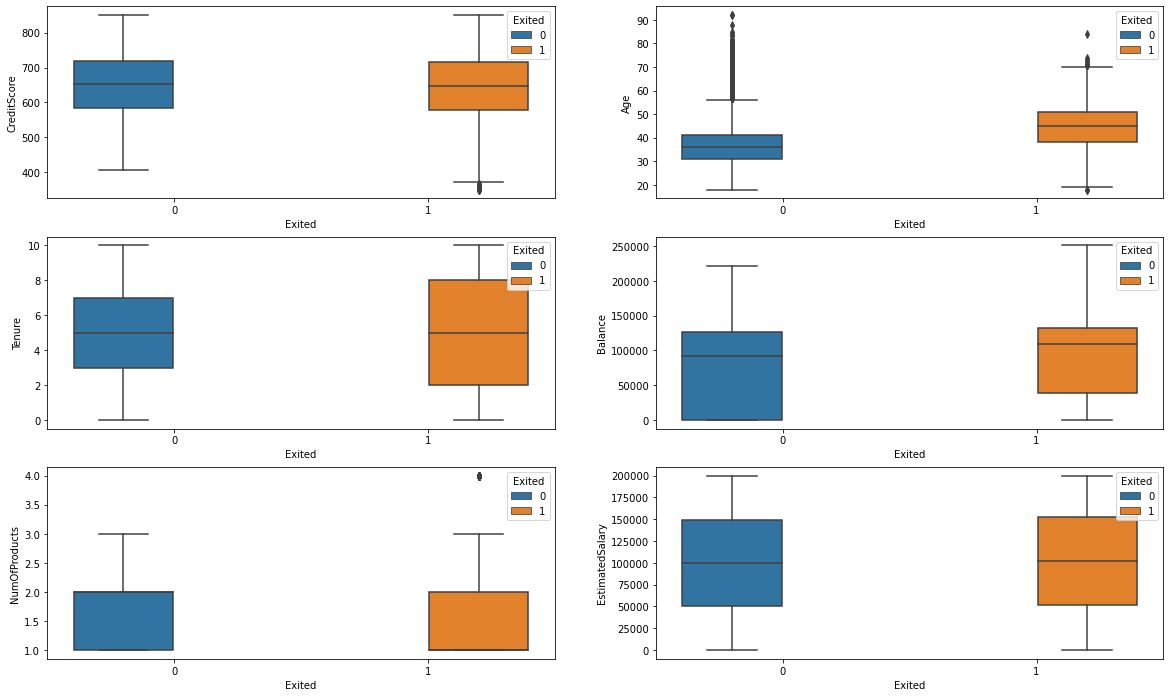

In [19]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

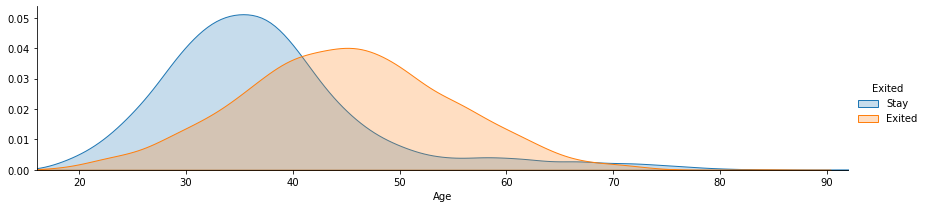

In [20]:
#visulaization relation between Age and Exited
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=4)
FacetGrid.map(sns.kdeplot, 'Age', shade=True )
FacetGrid.set(xlim=(16, data['Age'].max()))
FacetGrid.add_legend(labels = ['Stay', "Exited"])

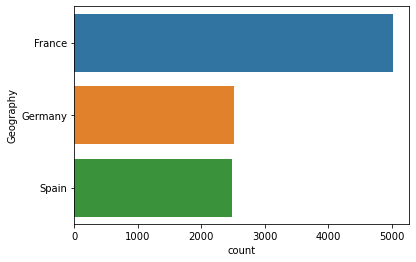

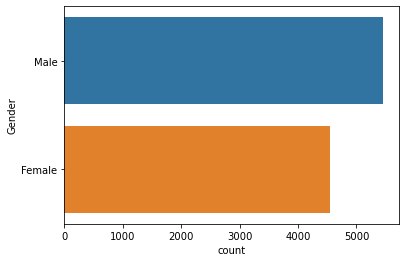

In [21]:
#Vislization of the count of each value in Geography featrure
sns.countplot(y=data['Geography'], data=data, order = data['Geography'].value_counts().index)
plt.show()
#Vislization of the count of each value in Gender feature

sns.countplot(y=data['Gender'], data=data, order = data['Gender'].value_counts().index)
plt.show()

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[1])

In [22]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

# Model Building

In [23]:
### Data Preparations for Model

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in ['Surname','Geography','Gender']:
    data[feat] = le.fit_transform(data[feat].astype(str))

In [24]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
x=data.drop(['Exited','CustomerId'],axis =1)
y=data.Exited

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=105)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix, precision_score
from sklearn.metrics import recall_score,roc_auc_score,f1_score,roc_curve, confusion_matrix, f1_score

In [28]:
def train_accuracy(v):
    return(accuracy_score(ytrain,v.predict(xtrain)))

def test_accuracy(w):
    return(accuracy_score(ytest,w.predict(xtest)))
    
def roc_cur(a):
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
def roc_score(b):
    return(roc_auc_score(ytest,b.predict(xtest)))

def class_report(c):
    print("Classification_report:", classification_report((ytest,c.predict(xtest))))

def sen(d):
    h=confusion_matrix(ytest,d.predict(xtest))
    sensitivity=h[1][1]/((h[1][1]+h[1][0]))
    return sensitivity
def spe(e):
    g=confusion_matrix(ytest,e.predict(xtest))
    sensitivity=g[0][0]/((g[0][0]+g[0][1]))
    return sensitivity

def f_score(f):
    return(f1_score(ytest,f.predict(xtest)))

def f1_w(i):
    labels=[0,1]
    f=f1_score(ytest,i.predict(xtest),average=None,labels=labels)
    return(round(((f[0]*ytest.value_counts()[0])+(f[1]*ytest.value_counts()[1]))/(ytest.value_counts()[0]+ytest.value_counts()[1]),4))


score_card = pd.DataFrame(columns=['Model_Name', 'Train_Accuracy', 'Test_Accuracy',
                                       'ROC_Score','Specificity','Sensitivity','f1_weighted_avg'])

def update_score_card(algorithm_name, model):
    
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name, 'Train_Accuracy': train_accuracy(model),
                                    'Test_Accuracy': test_accuracy(model), 'ROC_Score': roc_score(model),
                                    'Specificity':spe(model),'Sensitivity':sen(model),
                                    'f1_weighted_avg':f1_w(model)}, ignore_index = True)
def scores(a):
    print("Train_Accuracy_Score:",round(accuracy_score(ytrain,a.predict(xtrain)),3))
    print("Test_Accuracy_Score:",round(accuracy_score(ytest,a.predict(xtest)),3))
    print('\n')
    fpr,tpr,threshold=roc_curve(ytest,a.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    
    print("roc_auc_score:",round(roc_auc_score(ytest,a.predict(xtest)),3))
    print('\n')
    print("Classification_report:\n", classification_report(ytest,a.predict(xtest)))
    
    
    plot_confusion_matrix(a,xtest,ytest)
    print(confusion_matrix(ytest,a.predict(xtest)))

Train_Accuracy_Score: 0.788
Test_Accuracy_Score: 0.792


roc_auc_score: 0.516


Classification_report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2408
           1       0.35      0.06      0.10       592

    accuracy                           0.79      3000
   macro avg       0.58      0.52      0.49      3000
weighted avg       0.72      0.79      0.73      3000

[[2342   66]
 [ 557   35]]


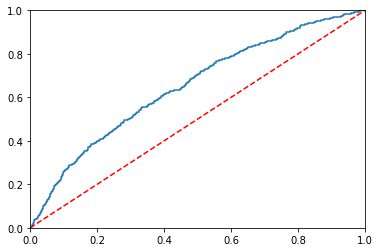

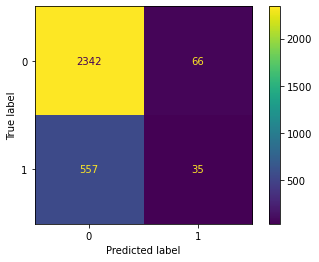

In [29]:
logreg=LogisticRegression(random_state=25)
logreg_model=logreg.fit(xtrain,ytrain)

scores(logreg_model)

update_score_card('LogisticRegression',logreg_model)

Train_Accuracy_Score: 1.0
Test_Accuracy_Score: 0.789


roc_auc_score: 0.677


Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2408
           1       0.47      0.49      0.48       592

    accuracy                           0.79      3000
   macro avg       0.67      0.68      0.67      3000
weighted avg       0.79      0.79      0.79      3000

[[2077  331]
 [ 301  291]]


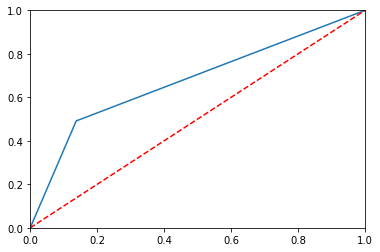

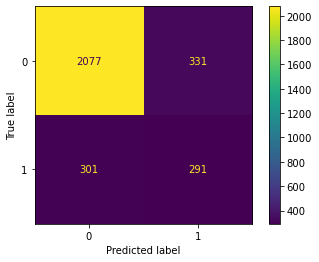

In [30]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain,ytrain)

scores(dt_model)
update_score_card('DecisionTreeClassifier',dt_model)

Train_Accuracy_Score: 1.0
Test_Accuracy_Score: 0.861


roc_auc_score: 0.709


Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2408
           1       0.74      0.46      0.57       592

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

[[2313   95]
 [ 321  271]]


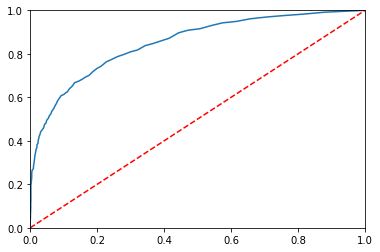

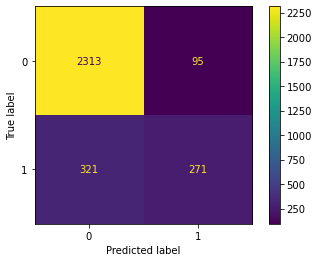

In [31]:
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)

scores(rf_model)
update_score_card('RandomForestClassifier',rf_model)

In [32]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,LogisticRegression,0.788286,0.792333,0.515856,0.972591,0.059122,0.7284
1,DecisionTreeClassifier,1.000000,0.789333,0.677048,0.862542,0.491554,0.7913
2,RandomForestClassifier,1.000000,0.861333,0.709159,0.960548,0.457770,0.8481


In [33]:
from xgboost import XGBClassifier

[22:48:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train_Accuracy_Score: 0.974
Test_Accuracy_Score: 0.858


roc_auc_score: 0.726


Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2408
           1       0.69      0.51      0.59       592

    accuracy                           0.86      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.85      0.86      0.85      3000

[[2274  134]
 [ 291  301]]


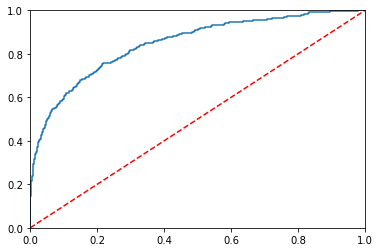

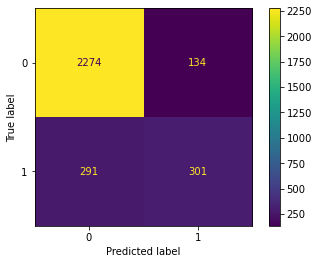

In [34]:
xg=XGBClassifier(random_state=25)
xg_model=xg.fit(xtrain,ytrain)

scores(xg_model)
update_score_card('XGBClassifier',xg_model)
    


In [35]:
## Feature Importance
pd.DataFrame(xg_model.feature_importances_,index=xtrain.columns,columns=['Importance']).sort_values('Importance',ascending=False)

,Importance
NumOfProducts,0.274370
IsActiveMember,0.198971
Age,0.132986
Geography,0.085598
Gender,0.061696
Balance,0.057299
EstimatedSalary,0.040290
CreditScore,0.039360
Tenure,0.039116
Surname,0.037814


In [36]:
score_card

,Model_Name,Train_Accuracy,Test_Accuracy,ROC_Score,Specificity,Sensitivity,f1_weighted_avg
0,LogisticRegression,0.788286,0.792333,0.515856,0.972591,0.059122,0.7284
1,DecisionTreeClassifier,1.000000,0.789333,0.677048,0.862542,0.491554,0.7913
2,RandomForestClassifier,1.000000,0.861333,0.709159,0.960548,0.457770,0.8481
3,XGBClassifier,0.973857,0.858333,0.726399,0.944352,0.508446,0.8497
